# CMD Args

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Setup

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns; sns.set()
from pathlib import Path
import os, sys
import shutil
from time import sleep
from tqdm import tqdm
import csv

# Data Loading

In [5]:
filename = "IBM_2023-11-22.csv"

current_path_raw = os.getcwd()
current_path = Path(current_path_raw)
stored_path = str(current_path.parent) + "/sample_data/" + filename

stock_data = [] # [(datetime string, price)]

with open(stored_path) as file:
    # file structure (cols): date,open,high,low,close,volume
    
    reader = csv.reader(file)
    next(reader, None) # Skip header row
    
    for row in reader:    
        stock_data.append((row[0], row[1]))
        
stock_data = stock_data[::-1]

# Helper Functions

In [44]:
def plot_line_chart(datetimes, prices):
    xpoints = np.array(datetimes)
    ypoints = np.array(prices)

    plt.plot(xpoints, ypoints)
    plt.show()
    
    
def plot_line_chart_seaborne(datetimes, prices):
    df = pd.DataFrame(list(zip(datetimes, prices)),
               columns =['Time', 'Prices'])
    
    plt.figure(figsize=(14,5))
    
    sns.set_style("ticks")
    chart = sns.lineplot(data=df,x="Time",y='Prices',color='firebrick')
    #sns.despine()

    plt.xticks(rotation=45,horizontalalignment='right',fontweight='light')
    locator = mdates.DayLocator(interval=70)
    chart.xaxis.set_major_locator(locator)

    plt.show()
    
def split_into_datetimes_prices(stock_data):
    datetimes, prices = zip(*stock_data)
    return datetimes, map(float, prices)
    
# day in the format: 'YYYY-MM-DD'
def get_day_data(stock_data, day):
    return list(filter(lambda entry: entry[0].startswith(day),stock_data))

def get_day_data_cropped(stock_data, day):
    # Drop first 70 and last 40 entries due to missing data entries at the edges
    res = get_day_data(stock_data, day)
    res = res[70:-40]
    return res

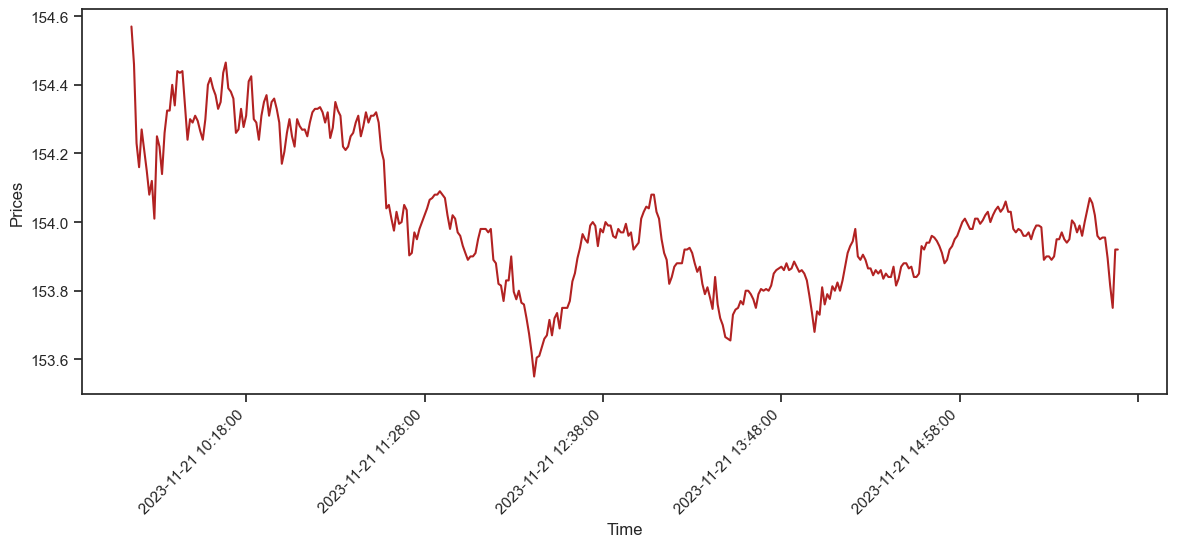

In [45]:
datetimes, prices = split_into_datetimes_prices(get_day_data_cropped(stock_data, "2023-11-21"))
plot_line_chart_seaborne(datetimes, prices)